In [118]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [119]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1,random_state=740)
data = data[:20000]
data.head(10)

# Data Visualization

In [121]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [122]:
data.head(10)

,polarity,id,date,query,user,text
1348345,4,2044847198,Fri Jun 05 09:54:00 PDT 2009,NO_QUERY,Sun_Shin,I'm getting know about twitter
1127353,4,1975170938,Sat May 30 14:35:44 PDT 2009,NO_QUERY,officialemily,"@paigeoneill why? ahahaa. not that im not, i j..."
480304,0,2179196765,Mon Jun 15 08:46:40 PDT 2009,NO_QUERY,nyyankee2jeter,My body won't me sleep after 8:30.
415854,0,2061166868,Sat Jun 06 20:18:47 PDT 2009,NO_QUERY,naughtyhaughty,@loveisaliexx u and me both &lt;3 how are you ...
807142,4,1468937319,Tue Apr 07 04:29:28 PDT 2009,NO_QUERY,BillyBrahhh,I want a george bush. Someone should come pick...
1013364,4,1881307107,Fri May 22 04:16:15 PDT 2009,NO_QUERY,Brera4wl,Well all I can say is the English had better w...
1280264,4,2001617130,Tue Jun 02 01:29:06 PDT 2009,NO_QUERY,hcouvreur,@on_point one of many it turns out
1434845,4,2060700951,Sat Jun 06 19:24:37 PDT 2009,NO_QUERY,SandwichINK,Did you know u can sub to any blog EVEN if doe...
1450820,4,2062980677,Sun Jun 07 00:57:20 PDT 2009,NO_QUERY,holidaycarclub,"Brisbane - Toyota - Hiace - 1984 - $3,900 - n..."
1327524,4,2015400141,Wed Jun 03 04:33:45 PDT 2009,NO_QUERY,gracielou105,@teacherericka Ricka! PreBeachaby sleepover ur...


In [123]:
data['polarity'].unique()

array([4, 0])

In [124]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1348345,1,2044847198,Fri Jun 05 09:54:00 PDT 2009,NO_QUERY,Sun_Shin,I'm getting know about twitter
1127353,1,1975170938,Sat May 30 14:35:44 PDT 2009,NO_QUERY,officialemily,"@paigeoneill why? ahahaa. not that im not, i j..."
480304,0,2179196765,Mon Jun 15 08:46:40 PDT 2009,NO_QUERY,nyyankee2jeter,My body won't me sleep after 8:30.
415854,0,2061166868,Sat Jun 06 20:18:47 PDT 2009,NO_QUERY,naughtyhaughty,@loveisaliexx u and me both &lt;3 how are you ...
807142,1,1468937319,Tue Apr 07 04:29:28 PDT 2009,NO_QUERY,BillyBrahhh,I want a george bush. Someone should come pick...


In [125]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.502550,1.998612e+09
std,0.500006,1.942365e+08
min,0.000000,1.467816e+09
25%,0.000000,1.956546e+09
50%,1.000000,2.001947e+09
75%,1.000000,2.177227e+09
max,1.000000,2.329168e+09


In [126]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  10051
No. of negative tagged sentences is: 9949


In [127]:
# get a word count per of text
def word_count(words):
    return len(words.split())

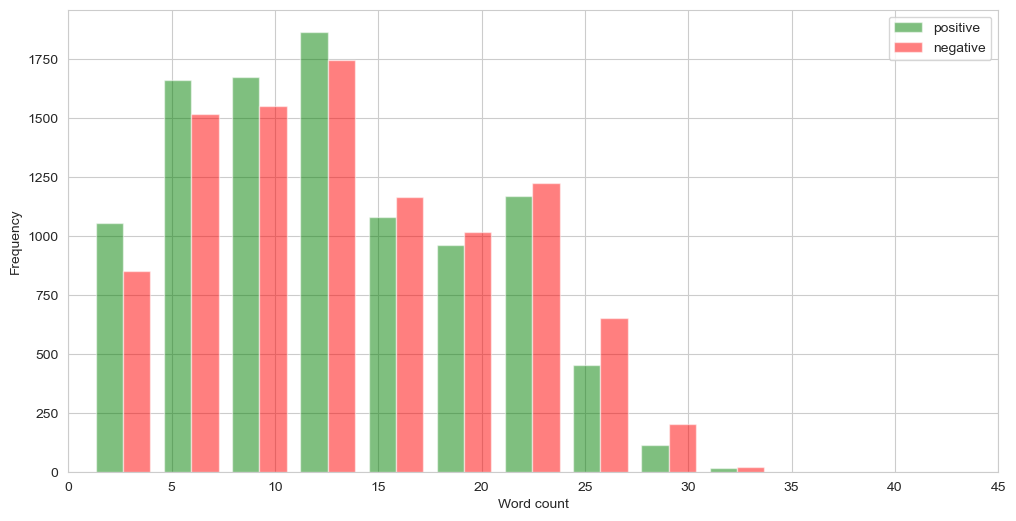

In [128]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [129]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6453),
 ('and', 3786),
 ('you', 3075),
 ('for', 2529),
 ('have', 1805),
 ('that', 1662),
 ("i'm", 1624),
 ('just', 1620),
 ('but', 1544),
 ('with', 1421),
 ('was', 1289),
 ('not', 1275),
 ('this', 1133),
 ('get', 1025),
 ('all', 989),
 ('are', 962),
 ('good', 945),
 ('like', 944),
 ('out', 836),
 ('your', 803)]

<Axes: xlabel='polarity', ylabel='count'>

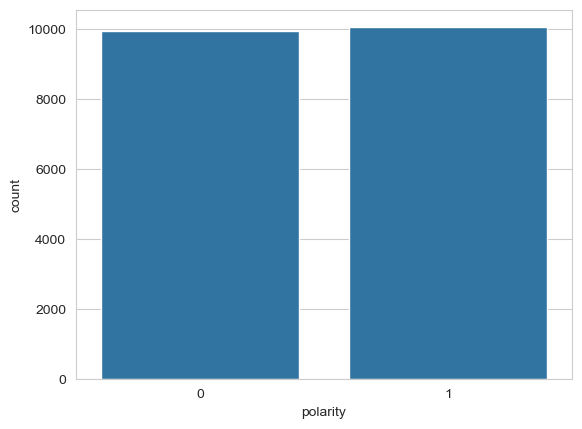

In [130]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [131]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [132]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
1348345,1,I'm getting know about twitter
1127353,1,"@paigeoneill why? ahahaa. not that im not, i j..."
480304,0,My body won't me sleep after 8:30.
415854,0,@loveisaliexx u and me both &lt;3 how are you ...
807142,1,I want a george bush. Someone should come pick...
1013364,1,Well all I can say is the English had better w...
1280264,1,@on_point one of many it turns out
1434845,1,Did you know u can sub to any blog EVEN if doe...
1450820,1,"Brisbane - Toyota - Hiace - 1984 - $3,900 - n..."
1327524,1,@teacherericka Ricka! PreBeachaby sleepover ur...


In [133]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [134]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [135]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'hadn', 're', 'more', 'until', 'no', 'very', 'ma', 'ours', 'what', 'she', 'how', 'above', 'an', 'our', "he'd", 'each', 'both', "she'll", 'mustn', 'should', 'll', 'with', 'below', 'down', "haven't", 'have', 'as', 't', 'its', 'been', "they've", 'all', 'but', "i'd", 'me', 'won', 'needn', 'just', 'was', "shouldn't", 'will', 'doing', "you've", 'their', 'because', "wouldn't", 'theirs', 'so', "isn't", "won't", 'don', 'hers', 'herself', 'o', 'from', 'few', "i've", 'too', "they're", "mightn't", 'under', 'weren', "needn't", "hasn't", 'against', 'hasn', 'and', 'yourselves', "aren't", 'than', 've', 'most', 'i', "shan't", 'be', 'd', 'shan', "we're", "he's", 'again', "they'll", 'off', 'up', "we'll", 'they', 'this', 'those', 'your', 'to', 'has', 'or', 'ourselves', 'them', 'is', 'had', 'being', "they'd", 'a', 'couldn', "mustn't", 's', 'same', 'y', 'other', 'such', 'there', 'why', 'nor', "you're", "don't", 'my', 'themselves', 'while', 'having', 'myself', "he'll", 'did', 'once', "it'll", 'we', 'after',

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [137]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets_negation_handling_fix(tweet):
    # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    # 移除非字母数字、空格和'的字符
    tweet = re.sub(r"[^\w\s']", '', tweet)
    # --- 特殊否定缩写处理 ---
    # 1. 明确处理 can't → cannot
    tweet = re.sub(r"\bcan't\b", "cannot", tweet)
    # 2. 处理 won't → will not
    tweet = re.sub(r"\bwon't\b", "will not", tweet)
    # 3. 处理 shan't → shall not
    tweet = re.sub(r"\bshan't\b", "shall not", tweet)
    # 4. 处理 ain't → is not
    tweet = re.sub(r"\bain't\b", "is not", tweet)
    # --- 通用n't处理 ---
    # 将剩余n't替换为 not（如didn't → did not）
    tweet = re.sub(r"n't\b", " not", tweet)
    # --- 处理其他撇号为空格（如I'll → I ll）---
    tweet = re.sub(r"'", ' ', tweet)

    #tokenizing words
    tokens = word_tokenize(tweet)
    # Remove punctuations but remain ‘n't’
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]

    for w in tokens:
        if len(w) > 1:
            # 动词词性还原（解决 does→doe 问题）
            word = wordLemm.lemmatize(w, pos='v')
            # 名词词性还原（根据任务需求）
            word = wordLemm.lemmatize(word, pos='n')
            finalwords.append(word)
    return ' '.join(finalwords)

In [138]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets_negation_handling_fix(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [139]:
data.head(10)

,polarity,text,processed_tweets
1348345,1,I'm getting know about twitter,im getting know about twitter
1127353,1,"@paigeoneill why? ahahaa. not that im not, i j...",why ahahaa not_that im not_just want to know
480304,0,My body won't me sleep after 8:30.,my body wont me sleep after 830
415854,0,@loveisaliexx u and me both &lt;3 how are you ...,and me both lt3 how are you babygirl miss ya
807142,1,I want a george bush. Someone should come pick...,want george bush someone should come pick me up
1013364,1,Well all I can say is the English had better w...,well all can say is the english had better wat...
1280264,1,@on_point one of many it turns out,one of many it turn out
1434845,1,Did you know u can sub to any blog EVEN if doe...,did you know can sub to any blog even if doesn...
1450820,1,"Brisbane - Toyota - Hiace - 1984 - $3,900 - n...",brisbane toyota hiace 1984 3900 new ad receive...
1327524,1,@teacherericka Ricka! PreBeachaby sleepover ur...,ricka prebeachaby sleepover ur place what do s...


# RNN - LSTM

In [140]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization, LeakyReLU

## Hyperparameters

In [141]:
num_epochs = 10
max_len = 200
hidden_units = 4
LSTM_units = 32
max_words = 5000
embedding_dim = 64
learning_rate = 0.001
dropout = 0.0

results = {}
params_history = {}

# 激活函数组合
# 自定义 Sign Function
from tensorflow.keras import backend as K
def sign_activation(x):
    return K.sign(x)

hidden_activations = {'ReLU': 'relu', 'LeakyReLU': layers.LeakyReLU(), 'ELU': 'elu'}
output_activations = {'Sign Function': sign_activation, 'Sigmoid': 'sigmoid', 'Tanh': 'tanh'}


## Converting text data into sequences

In [142]:
# Initialize the tokenizer, keeping only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the processed tweets to build the word index
tokenizer.fit_on_texts(data.processed_tweets)
# Convert each tweet (text) into a sequence of integer indices based on the word index
sequences = tokenizer.texts_to_sequences(data.processed_tweets)

# Pad or truncate all sequences to the same length ('max_len')
# - If a sequence is shorter than 'max_len', it will be padded with zeros at the beginning.
# - If a sequence is longer than 'max_len', it will be truncated from the beginning.
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   56   52   99]
 [   0    0    0 ...   59    1   56]
 [   0    0    0 ...  110  146 2970]
 ...
 [   0    0    0 ...  908   24  307]
 [   0    0    0 ...   48    8  190]
 [   0    0    0 ... 1194   16   67]]


## Split Traning and Test data

In [143]:
train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)
print(np.unique(train_label))
print(np.unique(test_label))

[0 1]
[0 1]


## Creating and Traning LSTM Model

In [144]:
def create_lstm_model(hidden_act_name, hidden_act, output_act):
    model = Sequential()
    model.add(layers.Embedding(max_words, embedding_dim))
    model.add(layers.LSTM(LSTM_units, dropout=dropout))
    model.add(layers.Dense(hidden_units, activation=hidden_act))
    model.add(layers.Dense(hidden_units, activation=hidden_act))
    model.add(layers.Dense(hidden_units, activation=hidden_act))
    model.add(layers.Dense(1, activation=output_act))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [145]:
models = {}
for hidden_act_name, hidden_act in hidden_activations.items():
    for output_act_name, output_act in output_activations.items():
        print(f"Training with Hidden Activation: {hidden_act_name}, Output Layer Activation: {output_act_name}...")

        model = create_lstm_model(hidden_act_name, hidden_act, output_act)

        history = model.fit(
            train_data, train_label,
            epochs=num_epochs,
            validation_data=(test_data, test_label),
            verbose=2
        )

        results[(hidden_act_name, output_act_name)] = {
            'train_acc': history.history['accuracy'][-1],
            'test_acc': history.history['val_accuracy'][-1]
        }

        params_history[(hidden_act_name, output_act_name)] = model.count_params()
        models[(hidden_act_name, output_act_name)] = model

Training with Hidden Activation: ReLU, Output Layer Activation: Sign Function...
Epoch 1/10
500/500 - 19s - 37ms/step - accuracy: 0.5072 - loss: 7.8716 - val_accuracy: 0.5255 - val_loss: 7.5765
Epoch 2/10
500/500 - 17s - 35ms/step - accuracy: 0.5085 - loss: 7.8504 - val_accuracy: 0.5255 - val_loss: 7.5765
Epoch 3/10
500/500 - 18s - 35ms/step - accuracy: 0.5041 - loss: 7.9218 - val_accuracy: 0.5255 - val_loss: 7.5765
Epoch 4/10
500/500 - 17s - 35ms/step - accuracy: 0.5049 - loss: 7.9088 - val_accuracy: 0.5255 - val_loss: 7.5765
Epoch 5/10
500/500 - 18s - 36ms/step - accuracy: 0.5069 - loss: 7.8756 - val_accuracy: 0.5255 - val_loss: 7.5765
Epoch 6/10
500/500 - 17s - 34ms/step - accuracy: 0.5111 - loss: 7.8091 - val_accuracy: 0.5255 - val_loss: 7.5765
Epoch 7/10
500/500 - 17s - 35ms/step - accuracy: 0.5102 - loss: 7.8224 - val_accuracy: 0.5255 - val_loss: 7.5765
Epoch 8/10
500/500 - 17s - 34ms/step - accuracy: 0.5077 - loss: 7.8638 - val_accuracy: 0.5255 - val_loss: 7.5765
Epoch 9/10
500/

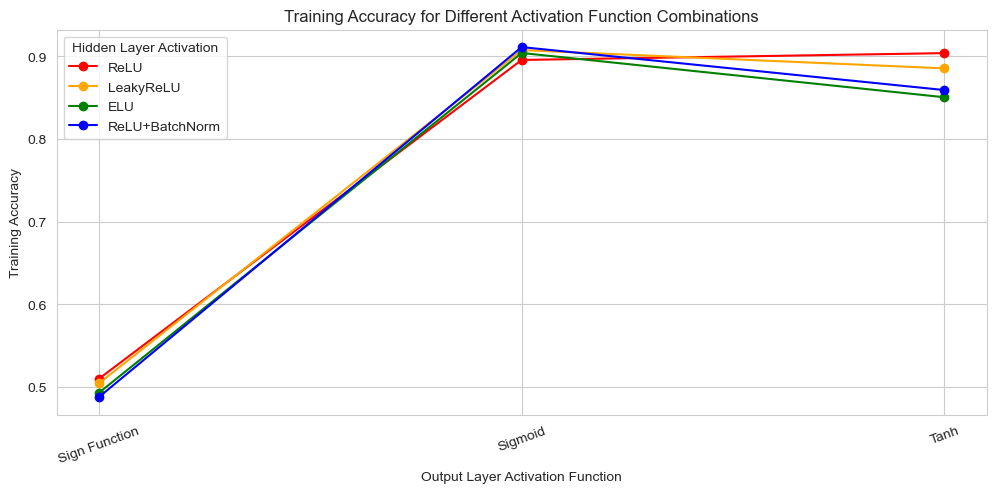

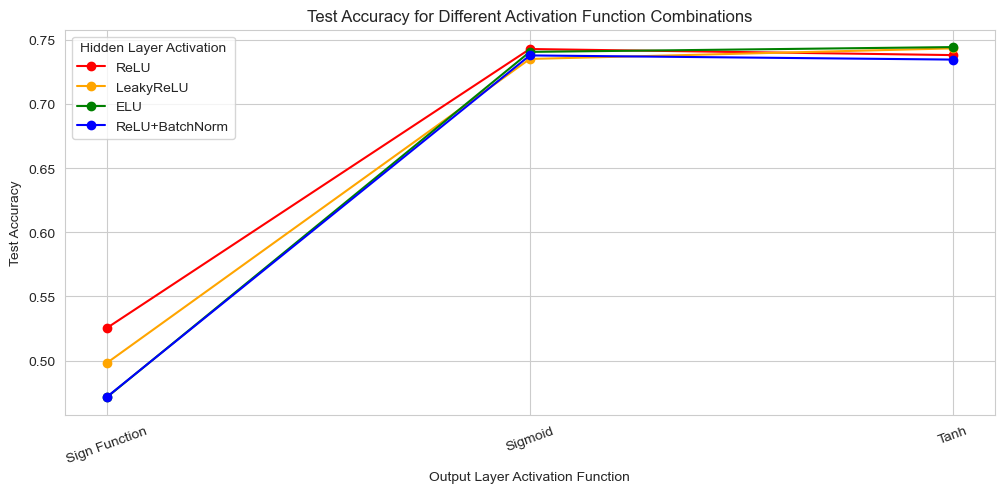

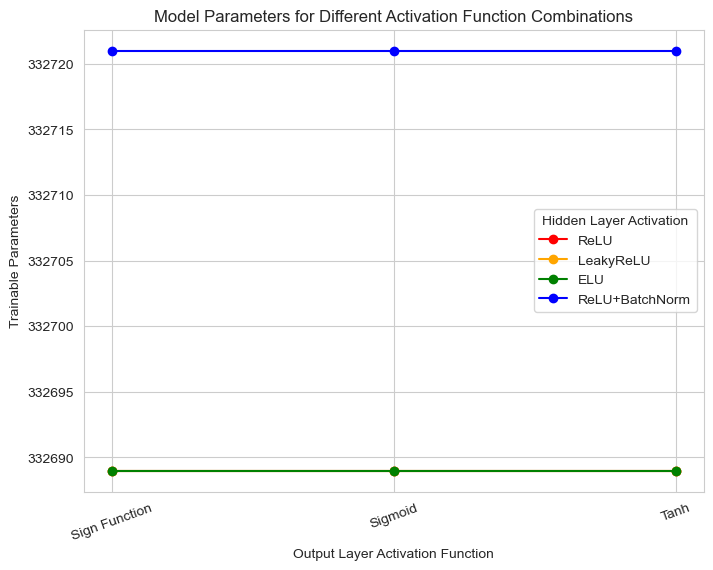

In [146]:
# 颜色列表
colors = ['red', 'orange', 'green', 'blue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# 获取所有隐藏层和输出层组合
hidden_act_names = list(hidden_activations.keys())
output_act_names = list(output_activations.keys())

# --- 训练精度折线图 ---
plt.figure(figsize=(12, 5))
for i, hidden_act in enumerate(hidden_act_names):
    train_acc = [results[(hidden_act, output_act)]['train_acc'] for output_act in output_act_names]
    plt.plot(output_act_names, train_acc, marker='o', linestyle='-', color=colors[i], label=f"{hidden_act}")
plt.xlabel("Output Layer Activation Function")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy for Different Activation Function Combinations")
plt.legend(title="Hidden Layer Activation")
plt.xticks(rotation=20)
plt.show()

# --- 测试精度折线图 ---
plt.figure(figsize=(12, 5))
for i, hidden_act in enumerate(hidden_act_names):
    test_acc = [results[(hidden_act, output_act)]['test_acc'] for output_act in output_act_names]
    plt.plot(output_act_names, test_acc, marker='o', linestyle='-', color=colors[i], label=f"{hidden_act}")
plt.xlabel("Output Layer Activation Function")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for Different Activation Function Combinations")
plt.legend(title="Hidden Layer Activation")
plt.xticks(rotation=20)
plt.show()

# --- 参数量变化折线图 ---
plt.figure(figsize=(8, 6))
for i, hidden_act in enumerate(hidden_act_names):
    params = [params_history[(hidden_act, output_act)] for output_act in output_act_names]
    plt.plot(output_act_names, params, marker='o', linestyle='-', color=colors[i], label=f"{hidden_act}")
plt.xlabel("Output Layer Activation Function")
plt.ylabel("Trainable Parameters")
plt.title("Model Parameters for Different Activation Function Combinations")
plt.legend(title="Hidden Layer Activation")
plt.xticks(rotation=20)
plt.show()